In [70]:
import numpy as np
import BiasVarv2 as bv
import matplotlib.pyplot as plt
import random

In [71]:
n_res = 100000
f = np.sin
x = np.linspace(-1, 1, n_res)
y = f(np.pi*x)

In [126]:
num_model = 100
num_sample = 200

In [127]:
const_weights = np.array([])
for i in range(num_model):
    x_sample = np.random.choice(x, num_sample)
    y_sample = f(np.pi*x_sample)
    const_weights = np.append(const_weights, np.mean(y_sample))

In [128]:
const_weights

array([-0.07164346,  0.01058121, -0.0113899 ,  0.04955783,  0.03502294,
        0.03733634,  0.03094338, -0.00666026,  0.03343142, -0.00953376,
        0.01796175, -0.01585986,  0.02024203, -0.0701745 ,  0.02340954,
        0.02929211, -0.06304583, -0.00759675, -0.03755301, -0.01679281,
       -0.00780313, -0.00666289,  0.03971709,  0.04075234, -0.02879282,
       -0.03542756,  0.02655505, -0.04580727, -0.01167059, -0.02806265,
        0.05798155, -0.0809    ,  0.07672041, -0.13434435, -0.06065244,
        0.01074194,  0.03523977, -0.10932516,  0.04989315,  0.05977413,
       -0.00569336, -0.02467149, -0.00933722,  0.00702272,  0.04812041,
        0.00242097, -0.08052426,  0.04183864,  0.06463339, -0.06162516,
        0.05164492,  0.0351984 ,  0.03026771,  0.04867798, -0.02357179,
       -0.01843293, -0.11199112,  0.01632865, -0.03916517,  0.11307164,
        0.03443243,  0.0212752 , -0.00365428, -0.01108093,  0.00035733,
        0.02925469, -0.01277443, -0.14901527,  0.02188072,  0.05

g bar -0.00038


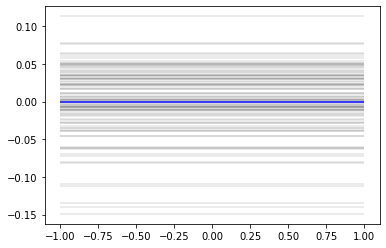

In [129]:
plt.hlines(const_weights, -1, 1, alpha=0.1)
const_gavg = np.mean(const_weights)
print('g bar', round(const_gavg, 5))
plt.hlines(const_gavg, -1, 1, color='blue')

In [130]:
const_bias = bv.cal_bias(const_gavg, y)

In [131]:
const_var = np.mean((const_weights - const_gavg)**2)

In [132]:
const_var

0.00227284782984037

In [133]:
fi = random.sample(range(n_res), num_model)
si = random.sample(range(n_res), num_model)

In [134]:
fi == si

False

In [135]:
lin_weights = []
for i in range(num_model):
    x1 = x[fi[i]]
    y1 = y[fi[i]]
    while fi[i] == si[i]:
        # random agian if same index
        si[i] = random.randint(0, len(fi)-1)
    x2 = x[si[i]]
    y2 = y[si[i]]
    
    m = (y1 - y2)/(x1 - x2)
    c = y1 - m*x1
    model_w = [c, m]
    lin_weights.append(model_w)
lin_weights = np.array(lin_weights)

In [136]:
x_aug = np.array([[1, i] for i in x])

In [137]:
lin_res = np.array([[i.dot(x_aug.T) for i in lin_weights]])

In [138]:
lin_gavg = np.mean(lin_weights, axis=0)
lin_gavg

array([-0.18575926,  0.86215586])

In [139]:
lin_bias = bv.cal_bias(lin_gavg.dot(x_aug.T), y)

In [140]:
lin_var = bv.cal_variance(lin_res, lin_gavg.dot(x_aug.T))

In [141]:
lin_bias, lin_var

(0.23342, 1.39719)

In [142]:
const_weights

array([-0.07164346,  0.01058121, -0.0113899 ,  0.04955783,  0.03502294,
        0.03733634,  0.03094338, -0.00666026,  0.03343142, -0.00953376,
        0.01796175, -0.01585986,  0.02024203, -0.0701745 ,  0.02340954,
        0.02929211, -0.06304583, -0.00759675, -0.03755301, -0.01679281,
       -0.00780313, -0.00666289,  0.03971709,  0.04075234, -0.02879282,
       -0.03542756,  0.02655505, -0.04580727, -0.01167059, -0.02806265,
        0.05798155, -0.0809    ,  0.07672041, -0.13434435, -0.06065244,
        0.01074194,  0.03523977, -0.10932516,  0.04989315,  0.05977413,
       -0.00569336, -0.02467149, -0.00933722,  0.00702272,  0.04812041,
        0.00242097, -0.08052426,  0.04183864,  0.06463339, -0.06162516,
        0.05164492,  0.0351984 ,  0.03026771,  0.04867798, -0.02357179,
       -0.01843293, -0.11199112,  0.01632865, -0.03916517,  0.11307164,
        0.03443243,  0.0212752 , -0.00365428, -0.01108093,  0.00035733,
        0.02925469, -0.01277443, -0.14901527,  0.02188072,  0.05

In [144]:
eouts = []
for i in const_weights:
    eout = bv.cal_e_out(i, y)
    eouts.append(eout)
np.mean(eins)

0.5022677999999999